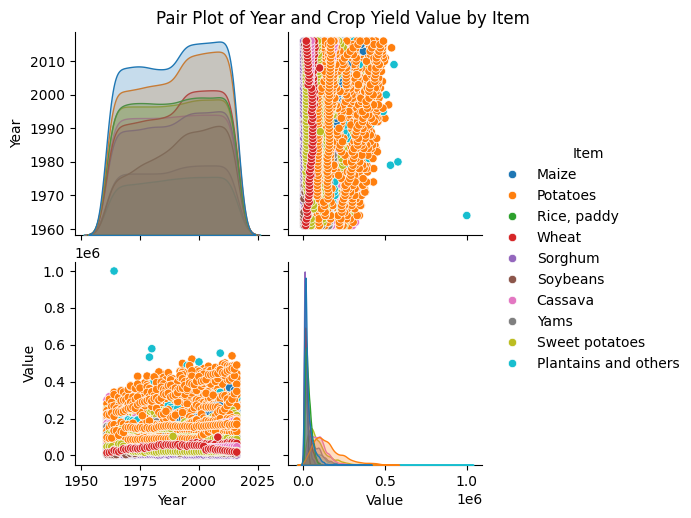

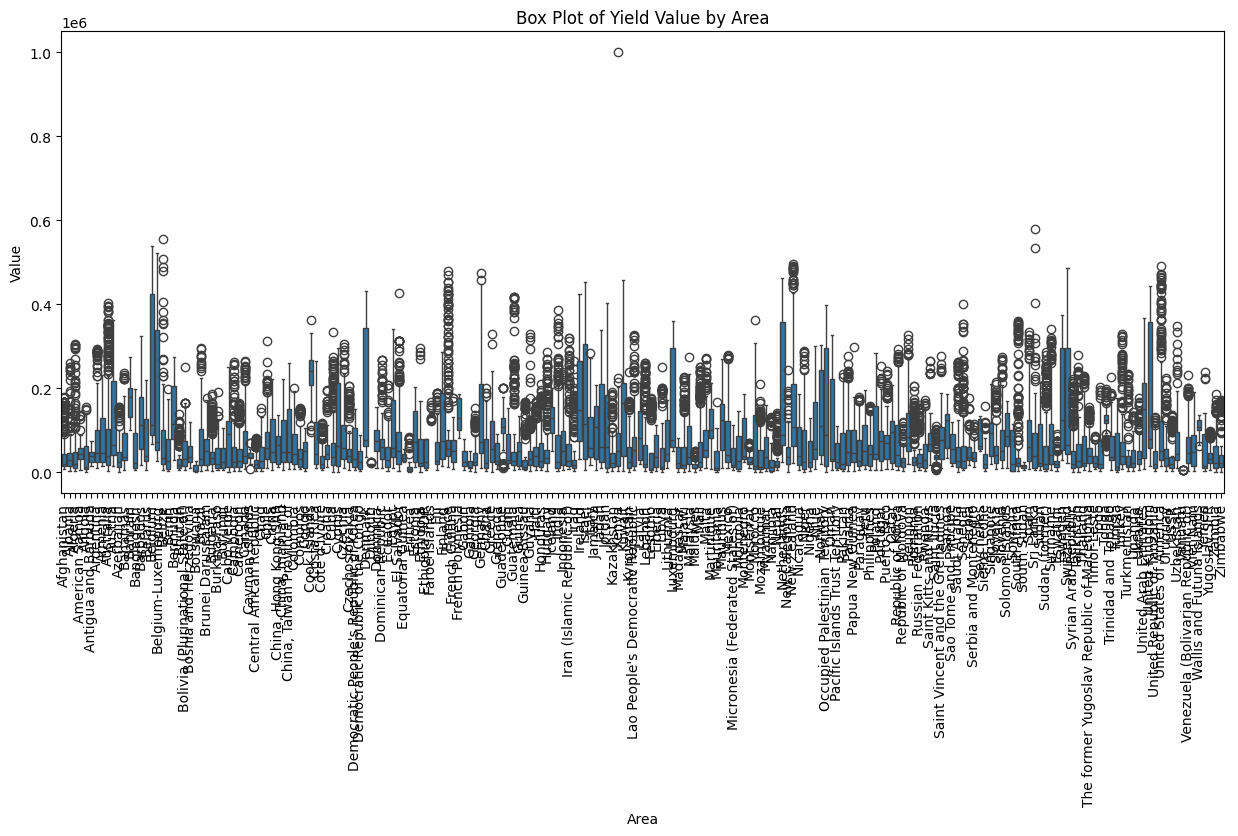

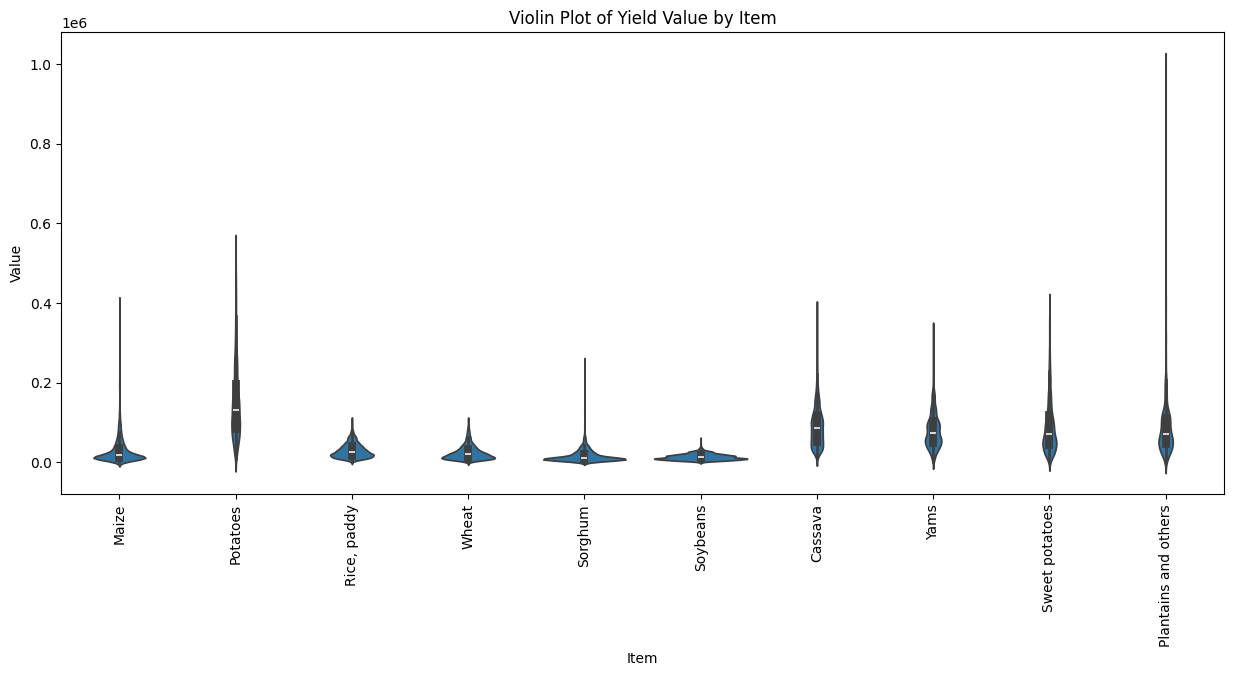

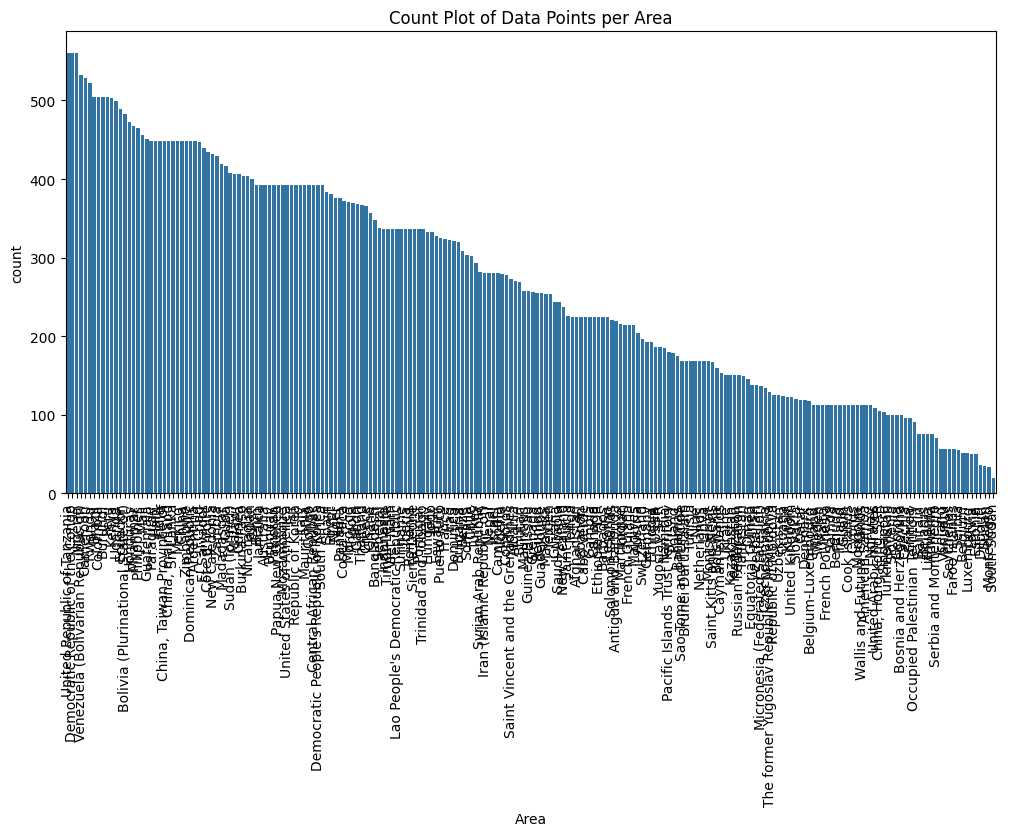

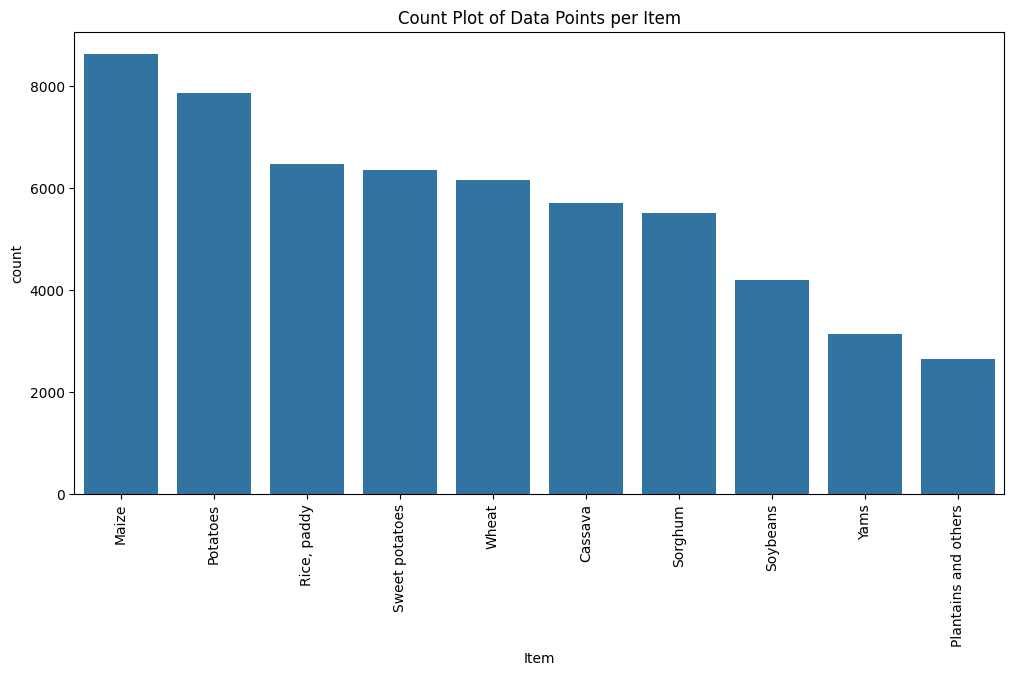

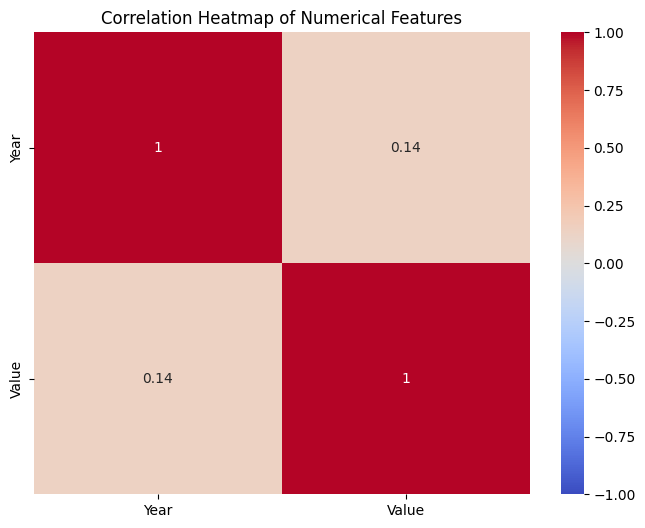

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("yield.csv")

# Ensure the data is clean and deduplicated
data.drop_duplicates(inplace=True)

# Pair Plot for Numerical Relationships
sns.pairplot(data, vars=['Year', 'Value'], hue='Item')
plt.suptitle('Pair Plot of Year and Crop Yield Value by Item', y=1.02)
plt.show()

# Box Plot for Value Distribution by Area
plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='Area', y='Value')
plt.xticks(rotation=90)
plt.title('Box Plot of Yield Value by Area')
plt.show()

# Violin Plot for Value Distribution by Item
plt.figure(figsize=(15, 6))
sns.violinplot(data=data, x='Item', y='Value')
plt.xticks(rotation=90)
plt.title('Violin Plot of Yield Value by Item')
plt.show()

# Count Plot for Categorical Features - Areas and Items
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Area', order=data['Area'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count Plot of Data Points per Area')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Item', order=data['Item'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count Plot of Data Points per Item')
plt.show()

# Correlation Heatmap for Numerical Features
plt.figure(figsize=(8, 6))
sns.heatmap(data[['Year', 'Value']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


### Techniques to Increase Data
1. Synthetic Data Generation with SMOTE
SMOTE (Synthetic Minority Over-sampling Technique) is commonly used for balancing imbalanced datasets but can also be applied to create new rows based on the feature space in numeric data.

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Load data
df = pd.read_csv('your_data.csv')

# Assuming 'Value' is the target, and other numeric columns are features
X = df.drop(['Value'], axis=1)
y = df['Value']

# Apply SMOTE
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine back into a DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Value'])], axis=1)

# Save new data to CSV
df_resampled.to_csv('augmented_data.csv', index=False)


2. Gaussian Noise for Numeric Features
You can slightly perturb numeric features by adding Gaussian noise to simulate small variations in the data.

In [ ]:
import numpy as np
import pandas as pd

# Load data
df = pd.read_csv('your_data.csv')

# Add Gaussian noise to numeric columns (e.g., 'Value')
df['Value_noisy'] = df['Value'] + np.random.normal(0, 0.05 * df['Value'], len(df))

# Save augmented data
df.to_csv('augmented_data.csv', index=False)


3. Jittering Numeric Features
Another technique to slightly alter numeric data by jittering, which adds random noise to continuous variables.


In [ ]:
def jitter(values, noise=0.01):
    return values + np.random.normal(0, noise * np.std(values), len(values))

# Apply jittering to the 'Value' column
df['Value_jittered'] = jitter(df['Value'])

# Save augmented data
df.to_csv('augmented_data_jittered.csv', index=False)


4. Time-Series Augmentation
For time-series data (e.g., Year-wise Yield), you can create new synthetic data by:

Window shifting: Move the window of observed data forward/backward by one year.
Rolling window averages: Smooth the data by averaging values in a moving window.

In [ ]:
# Create rolling averages for the 'Value' column
df['Value_rolling_avg'] = df['Value'].rolling(window=2).mean().fillna(df['Value'])

# Save augmented data
df.to_csv('augmented_data_rolling.csv', index=False)


5. Random Sampling with Replacement
You can sample rows with replacement from your existing data to increase the dataset size while keeping the overall distribution intact.

In [ ]:
# Random sampling with replacement
df_augmented = df.sample(n=5000, replace=True)

# Save augmented data
df_augmented.to_csv('augmented_data_sampled.csv', index=False)


6. Synthetic Data with GANs (Generative Adversarial Networks)
For advanced synthetic data generation, you can use GANs to generate synthetic rows. This method works well for more complex datasets but requires deep learning knowledge.

Step-by-Step Implementation
Install Required Libraries:

pip install pandas numpy scikit-learn imblearn

Apply Data Augmentation Techniques: You can apply one or more of the above techniques depending on your dataset's characteristics (e.g., categorical or numeric data).

Evaluate Model Performance: After generating more data, retrain your models (Linear Regression, Random Forest, Gradient Boost, etc.) and evaluate the performance. The increase in data should help improve model performance, especially on the test set.